In [2]:
#!/usr/bin/env python3

import pandas as pd
import seaborn as sns

In [3]:
r25_path = "..//data//route25_potential_and_real_stops.csv"
ridership = "..//data//Stop_Riders_Ranking_by_Route_Daily_Totals_May_2019.csv"
demos_path = "..//data//DemoByStops.csv"

In [4]:
r25_stop_ids = pd.read_csv(r25_path, usecols=['Est_TotPop_Density','CorrespondingStopID', 'Transfer'])
#r25_stop_ids.dropna(inplace=True)
r25_stop_ids.rename(columns={'CorrespondingStopID': 'StopId'})

,Est_TotPop_Density,Transfer,StopId
0,7456.09,Yes,58.0
1,7542.67,No,NaN
2,7629.25,No,NaN
3,7670.00,No,NaN
4,7619.07,Yes,675.0
...,...,...,...
565,646.81,No,NaN
566,682.46,No,NaN
567,723.20,No,NaN
568,763.94,No,NaN


In [24]:
ridership_data = pd.read_csv(ridership,thousands=',', usecols=['StopID','IndividUtilization','IndividRoute','NumberOfRoutes'])
#ridership_data = ridership_data[ridership_data['IndividRoute'] == 25]
ridership_data.rename(columns={'StopID' : 'StopId'}, inplace=True)
ridership_data

,StopId,IndividRoute,IndividUtilization,NumberOfRoutes
0,60,2,2.343189,16
1,63,2,0.652341,2
2,64,2,1.014553,2
3,65,2,1.617457,1
4,67,2,1.536975,3
...,...,...,...,...
3469,3881,903,0.107074,1
3470,3897,903,0.157181,1
3471,3898,903,0.040522,1
3472,3899,903,0.219002,1


In [25]:
demo_data = pd.read_csv(demos_path, usecols=['StopId','Routes', 'Est_Pop_Density_SqMile'])
demo_data

,StopId,Routes,Est_Pop_Density_SqMile
0,3273,104,3911.39
1,3972,104,3626.19
2,2720,104,3529.42
3,2740,104,1869.12
4,3984,104,1634.84
...,...,...,...
2378,1534,11,2724.73
2379,686,31,926.92
2380,823,31,926.92
2381,53,31,926.92


In [26]:
#final_data = pd.merge(r25_stop_ids, ridership_data, on='CorrespondingStopID', how='inner')
final_data = pd.merge(demo_data, ridership_data, on='StopId')

#final_data['TOTAL'] = final_data['TOTAL'].astype(int)
final_data['IndividUtilization'] = final_data['IndividUtilization'].astype(float)

In [27]:
final_data

,StopId,Routes,Est_Pop_Density_SqMile,IndividRoute,IndividUtilization,NumberOfRoutes
0,3273,104,3911.39,104,0.246273,1
1,3972,104,3626.19,104,0.037342,1
2,2720,104,3529.42,104,0.752315,1
3,2740,104,1869.12,104,0.095721,1
4,3984,104,1634.84,104,0.794445,1
...,...,...,...,...,...,...
3467,1534,11,2724.73,11,0.006039,1
3468,686,31,926.92,31,0.002353,1
3469,823,31,926.92,31,0.002105,1
3470,53,31,926.92,31,0.597142,1


In [28]:
# This is really informal, but basically a noticed that there are 
# a few stops with over a thousand riders, all on beach lines
# and I suspect we can safely exculde those
#final_data = final_data[final_data['IndividUtilization'] <= 1000]
    

In [29]:
def is_not_transfer_stop(row):
    routes = row['Routes'].split(',')
    return len(routes) == 1

#mask = final_data.apply(is_not_transfer_stop, axis=1)
#non_transfer = final_data[mask]
#non_transfer = final_data[final_data['Transfer'] == 'No']
non_transfer = final_data[final_data['NumberOfRoutes'] == 1]

non_transfer

,StopId,Routes,Est_Pop_Density_SqMile,IndividRoute,IndividUtilization,NumberOfRoutes
0,3273,104,3911.39,104,0.246273,1
1,3972,104,3626.19,104,0.037342,1
2,2720,104,3529.42,104,0.752315,1
3,2740,104,1869.12,104,0.095721,1
4,3984,104,1634.84,104,0.794445,1
...,...,...,...,...,...,...
3467,1534,11,2724.73,11,0.006039,1
3468,686,31,926.92,31,0.002353,1
3469,823,31,926.92,31,0.002105,1
3470,53,31,926.92,31,0.597142,1


[Text(0, 0.5, 'Average Ridership per Trip by Stop'),
 Text(0.5, 0, 'Population Density')]

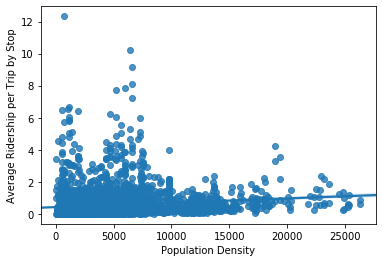

In [41]:
plt = sns.regplot(x=non_transfer['Est_Pop_Density_SqMile'], y=non_transfer['IndividUtilization'])
plt.set(xlabel='Population Density', ylabel='Average Ridership per Trip by Stop')

[Text(0, 0.5, 'Average Ridership per Trip by Stop'),
 Text(0.5, 0, 'Population Density')]

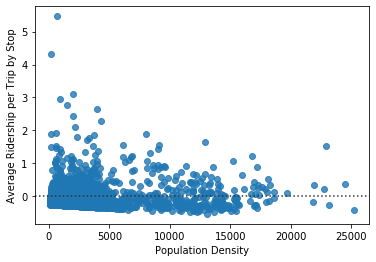

In [39]:
vice_plt = sns.residplot(x=non_transfer['Est_Pop_Density_SqMile'], y=non_transfer['IndividUtilization'])
vice_plt.set(xlabel='Population Density', ylabel='Average Ridership per Trip by Stop')

In [36]:
fig = plt.get_figure()
fig.savefig('..//plots//linear_pop_v_util_no_transfer.png')